In [25]:
import time
import random
import matplotlib.pyplot as plt

# Implementing B-Tree

In [26]:
class BTreeNode:
    def __init__(self, degree, leaf=True):
        self.degree = degree
        self.keys = []
        self.children = []
        self.leaf = leaf

    def insert_key_non_full(self, key):
        i = len(self.keys) - 1
        if self.leaf:
            # Insert key into the node
            self.keys.append(None)
            while i >= 0 and key < self.keys[i]:
                self.keys[i + 1] = self.keys[i]
                i -= 1
            self.keys[i + 1] = key
        else:
            # Find child to insert the key
            while i >= 0 and key < self.keys[i]:
                i -= 1
            if len(self.children[i + 1].keys) == (2 * self.degree) - 1:
                self.split_child(i + 1, self.children[i + 1])
                if key > self.keys[i + 1]:
                    i += 1
            self.children[i + 1].insert_key_non_full(key)

    def split_child(self, i, child):
        new_child = BTreeNode(child.degree, leaf=child.leaf)
        self.children.insert(i + 1, new_child)
        self.keys.insert(i, child.keys[self.degree - 1])
        new_child.keys = child.keys[self.degree:(2 * self.degree) - 1]
        child.keys = child.keys[0:self.degree - 1]
        if not child.leaf:
            new_child.children = child.children[self.degree:(2 * self.degree)]
            child.children = child.children[0:self.degree]

    def find_leaf_node_for_insertion(self, key):
        if self.leaf:
            return self
        i = 0
        while i < len(self.keys) and key > self.keys[i]:
            i += 1
        return self.children[i].find_leaf_node_for_insertion(key)

    def delete_key(self, key):
        i = 0
        while i < len(self.keys) and key > self.keys[i]:
            i += 1
        if i < len(self.keys) and key == self.keys[i]:
            if self.leaf:
                del self.keys[i]
            else:
                pass  # Implement deletion for internal nodes
        else:
            pass  # Implement deletion for internal nodes

    def search_key(self, key):
        i = 0
        while i < len(self.keys) and key > self.keys[i]:
            i += 1
        if i < len(self.keys) and key == self.keys[i]:
            return self
        elif self.leaf:
            return None
        else:
            return self.children[i].search_key(key)


class BTree:
    def __init__(self, degree):
        self.root = None
        self.degree = degree

    def insert_key(self, key):
        if not self.root:
            self.root = BTreeNode(self.degree, leaf=True)
            self.root.keys.append(key)
        else:
            if len(self.root.keys) == (2 * self.degree) - 1:
                new_root = BTreeNode(self.degree, leaf=False)
                new_root.children.append(self.root)
                new_root.split_child(0, self.root)
                i = 0 if new_root.keys[0] < key else 1
                new_root.children[i].insert_key_non_full(key)
                self.root = new_root
            else:
                self.root.insert_key_non_full(key)

    def delete_key(self, key):
        if self.root:
            self.root.delete_key(key)

    def search_key(self, key):
        if self.root:
            return self.root.search_key(key)
        return None

# Benchmarking Code

In [27]:
def benchmark_insertion(btree, keys):
    start_time = time.time()
    for key in keys:
        btree.insert_key(key)
    end_time = time.time()
    return end_time - start_time

def benchmark_deletion(btree, keys):
    start_time = time.time()
    for key in keys:
        btree.delete_key(key)
    end_time = time.time()
    return end_time - start_time

def benchmark_search(btree, keys):
    start_time = time.time()
    for key in keys:
        btree.search_key(key)
    end_time = time.time()
    return end_time - start_time

# Separate lists of keys for each operation
insertion_keys = random.sample(range(1, 100001), 10000)
deletion_keys = random.sample(insertion_keys, 5000)  # Choose keys from inserted keys
search_keys = random.sample(insertion_keys, 5000)    # Choose keys from inserted keys

# Benchmarking for different degrees
degrees = []

# Append numbers to the array in intervals of 5, from 5 to 500
for number in range(5, 501, 5):  # range(start, stop, step)
    degrees.append(number)
insertion_times = []
deletion_times = []
search_times = []

for degree in degrees:
    btree = BTree(degree)
    insertion_time = benchmark_insertion(btree, insertion_keys)
    deletion_time = benchmark_deletion(btree, deletion_keys)
    search_time = benchmark_search(btree, search_keys)
    insertion_times.append(insertion_time)
    deletion_times.append(deletion_time)
    search_times.append(search_time)

# Plotting Benchmark Results

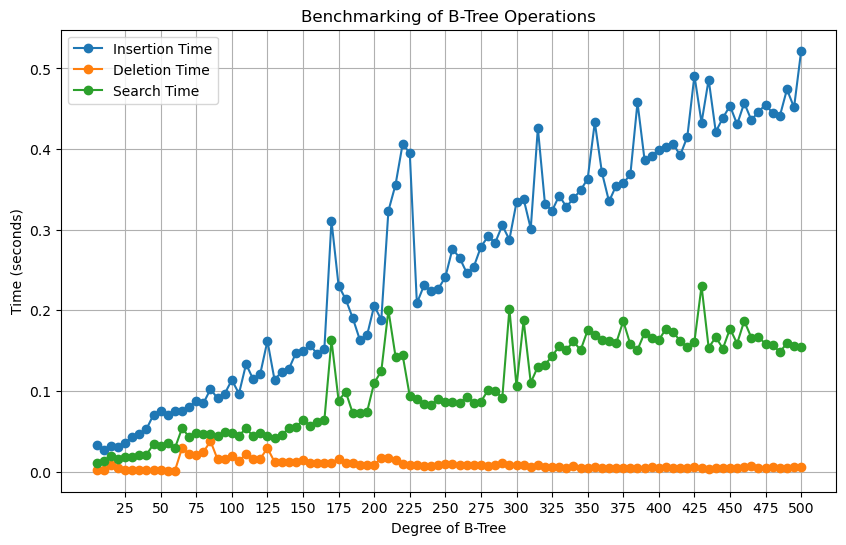

In [28]:
# Plotting the benchmark results
plt.figure(figsize=(10, 6))
plt.plot(degrees, insertion_times, marker='o', label='Insertion Time')
plt.plot(degrees, deletion_times, marker='o', label='Deletion Time')
plt.plot(degrees, search_times, marker='o', label='Search Time')
plt.title('Benchmarking of B-Tree Operations')
plt.xlabel('Degree of B-Tree')
plt.ylabel('Time (seconds)')
plt.xticks(list(range(25, 501, 25)))
plt.grid(True)
plt.legend()
plt.show()